In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = (18, 10)
plt.rcParams['axes.titlesize'] = 16

## Database Overview

This database contains hundreds of thousands of reports damage caused by birds to aircraft over the years in the United States. Most reports contain detailed information about the incident, that can be interesting to explore.

In [2]:
typeSpecification = {"Aircraft Model": str, "Engine Model": str, "Engine3 Position": str, "Engine1 Position": str}
df = pd.read_csv('../database/aircraft_wildlife_strikes.zip', compression='zip', dtype=typeSpecification)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174104 entries, 0 to 174103
Data columns (total 66 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Record ID             174104 non-null  int64  
 1   Incident Year         174104 non-null  int64  
 2   Incident Month        174104 non-null  int64  
 3   Incident Day          174104 non-null  int64  
 4   Operator ID           174104 non-null  object 
 5   Operator              174104 non-null  object 
 6   Aircraft              174104 non-null  object 
 7   Aircraft Type         133074 non-null  object 
 8   Aircraft Make         131051 non-null  object 
 9   Aircraft Model        122439 non-null  object 
 10  Aircraft Mass         127320 non-null  float64
 11  Engine Make           123434 non-null  float64
 12  Engine Model          121988 non-null  object 
 13  Engines               127342 non-null  float64
 14  Engine Type           127282 non-null  object 
 15  

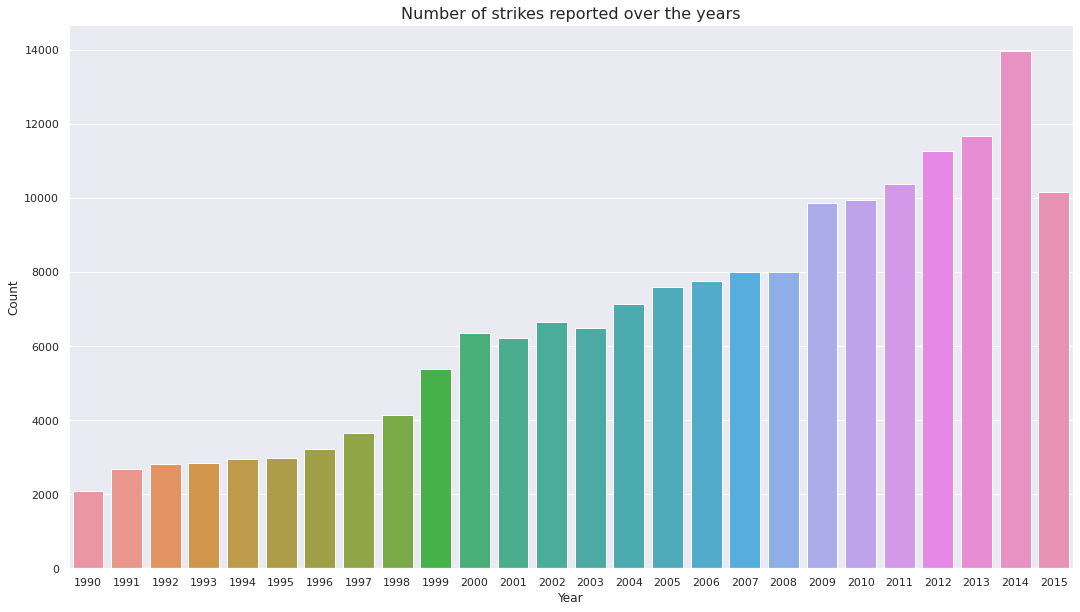

In [3]:
incidents_by_years = (df.groupby('Incident Year')
                      .agg({'Record ID': 'count'}).reset_index()
                      .rename(columns={'Record ID': 'Count', 'Incident Year': 'Year'}))
sns.barplot(data=incidents_by_years, x='Year', y='Count')
plt.title('Number of strikes reported over the years')
plt.show()

We can observe a predominant increase in the number of reports over the years. Looking more carefully to the records of 2015, we note that there is no incident reported since `October`, which strongly indicates that the data collected since then wasn't included in the database.

In [4]:
df.query("`Incident Year` == 2015")["Incident Month"].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

### Which Bird Species are more involved in accidents?

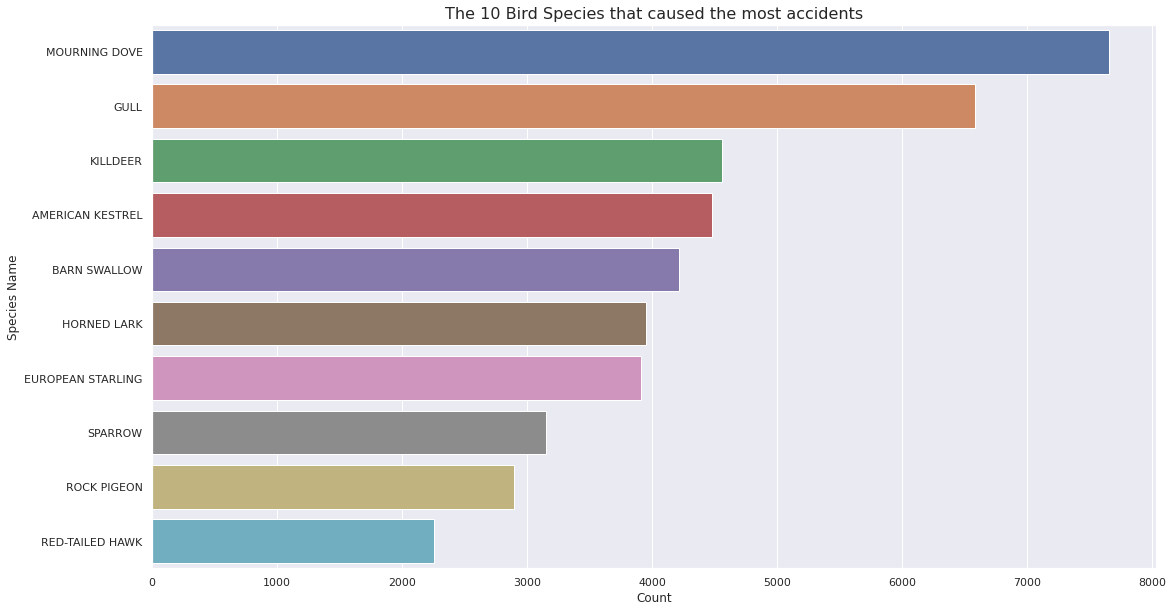

In [5]:
# Grouping accidents by Species, ordered by number of reports
birdSpecies = df.groupby('Species ID').agg({'Record ID': 'count', 'Species Name': 'unique'}).sort_values('Record ID', ascending=False).reset_index()
# Grabbing the Name of the species
birdSpecies['Species Name'] = birdSpecies['Species Name'].apply(lambda x: x[0])
# Removing Unknown Birds
birdSpecies.dropna(inplace=True)
birdSpecies = birdSpecies[birdSpecies['Species Name'].str.startswith('UNKNOWN') == False]
# Plotting
birdSpecies.rename(columns={'Record ID': 'Count'}, inplace=True)
sns.barplot(data=birdSpecies[:10], y='Species Name', x='Count')
plt.title('The 10 Bird Species that caused the most accidents')
plt.show()

### In which Flight Phases are accidents more common?

### In general, what aircraft parts are more affected?